# Spark code to Calculate Histogram

Here I'll show how to use Spark to calculate the frequency of Star Ratings on a Movie database with 100k ratings from different users

In [27]:
from pyspark import SparkConf, SparkContext
import collections
import time

import matplotlib.pyplot as plt

## Setup

In [2]:
conf = SparkConf().setMaster('local').setAppName('Ratingsistogram')
sc = SparkContext(conf = conf)

## Processing files

In [39]:
start_time = time.time()

In [40]:
lines = sc.textFile('ml-100k/u.data')
ratings = lines.map(lambda x: x.split()[2])
result = ratings.countByValue()

In [41]:
sortedresults = collections.OrderedDict(sorted(result.items()))

In [42]:
for k, v in sortedresults.items():
    print(k,v)

1 6110
2 11370
3 27145
4 34174
5 21201


In [43]:
end_time = time.time()
hours, rem = divmod(end_time-start_time, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

00:00:01.50


<BarContainer object of 5 artists>

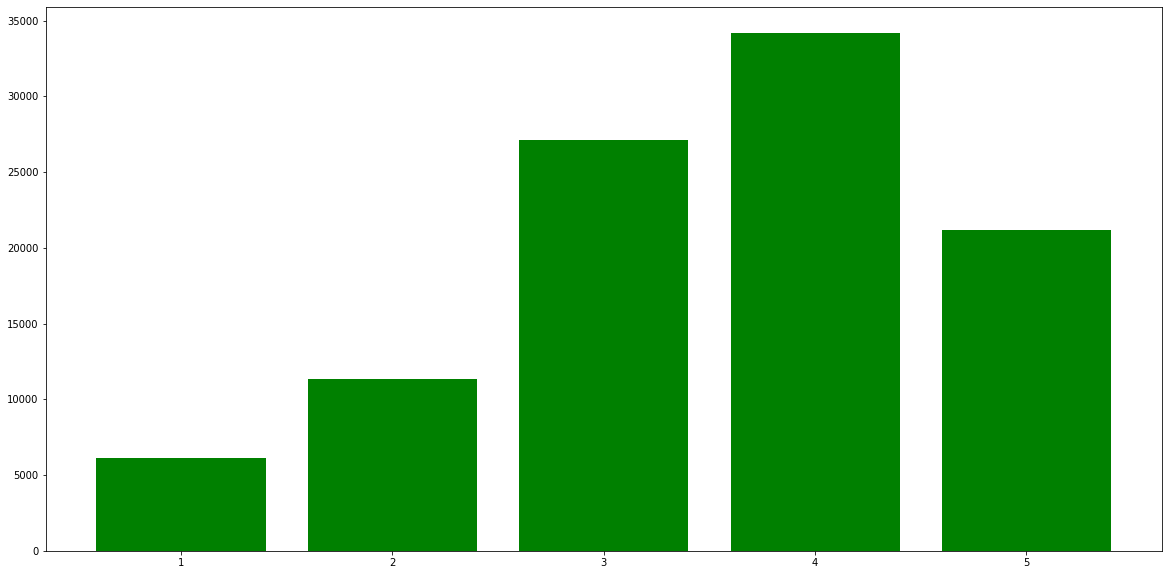

In [44]:
plt.figure(figsize=(20,10))
plt.bar(sortedresults.keys(), sortedresults.values(), color='g')

---

## 1 Million reviews

In [46]:
start_time = time.time()

In [47]:
lines = sc.textFile('ml-1m/ratings.dat')

In [48]:
ratings = lines.map(lambda x: x.split('::')[2])

In [49]:
result = ratings.countByValue()

In [50]:
sortedresults = collections.OrderedDict(sorted(result.items()))

In [51]:
for k, v in sortedresults.items():
    print(k,v)

1 56174
2 107557
3 261197
4 348971
5 226310


In [52]:
end_time = time.time()
hours, rem = divmod(end_time-start_time, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

00:00:03.26


<BarContainer object of 5 artists>

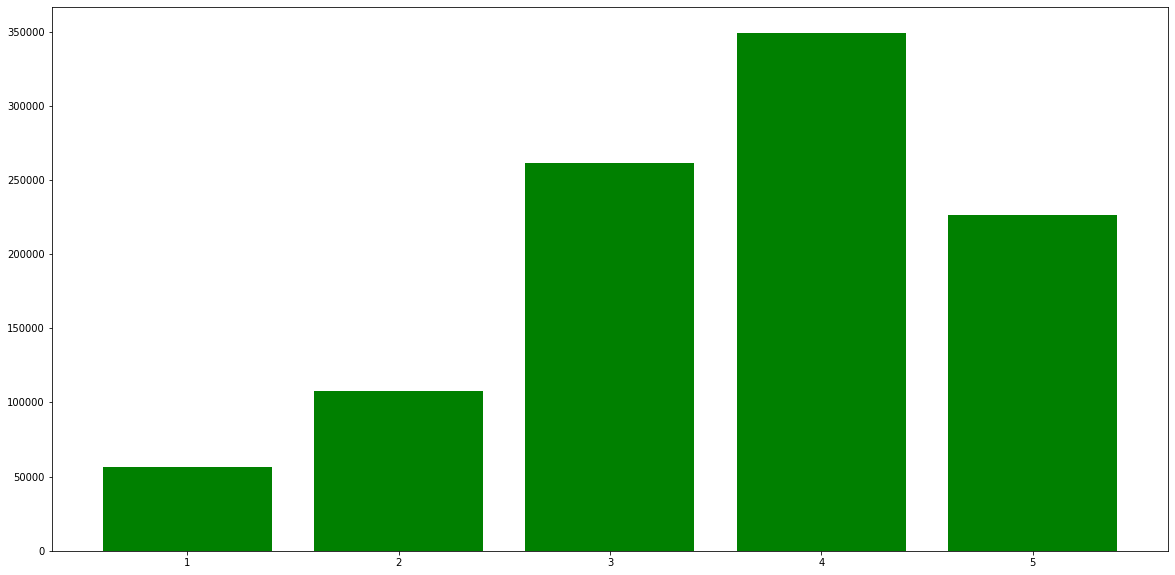

In [53]:
plt.figure(figsize=(20,10))
plt.bar(sortedresults.keys(), sortedresults.values(), color='g')

---

## 25 Million reviews

In [54]:
start_time = time.time()

In [55]:
lines = sc.textFile('ml-25m/ratings.csv')

In [56]:
ratings = lines.map(lambda x: x.split(',')[2])

In [57]:
result = ratings.countByValue()

In [58]:
sortedresults = collections.OrderedDict(sorted(result.items()))

In [59]:
for k, v in sortedresults.items():
    print(k,v)

0.5 393068
1.0 776815
1.5 399490
2.0 1640868
2.5 1262797
3.0 4896928
3.5 3177318
4.0 6639798
4.5 2200539
5.0 3612474
rating 1


In [62]:
end_time = time.time()
hours, rem = divmod(end_time-start_time, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

00:01:07.63


In [60]:
del sortedresults['rating']

<BarContainer object of 10 artists>

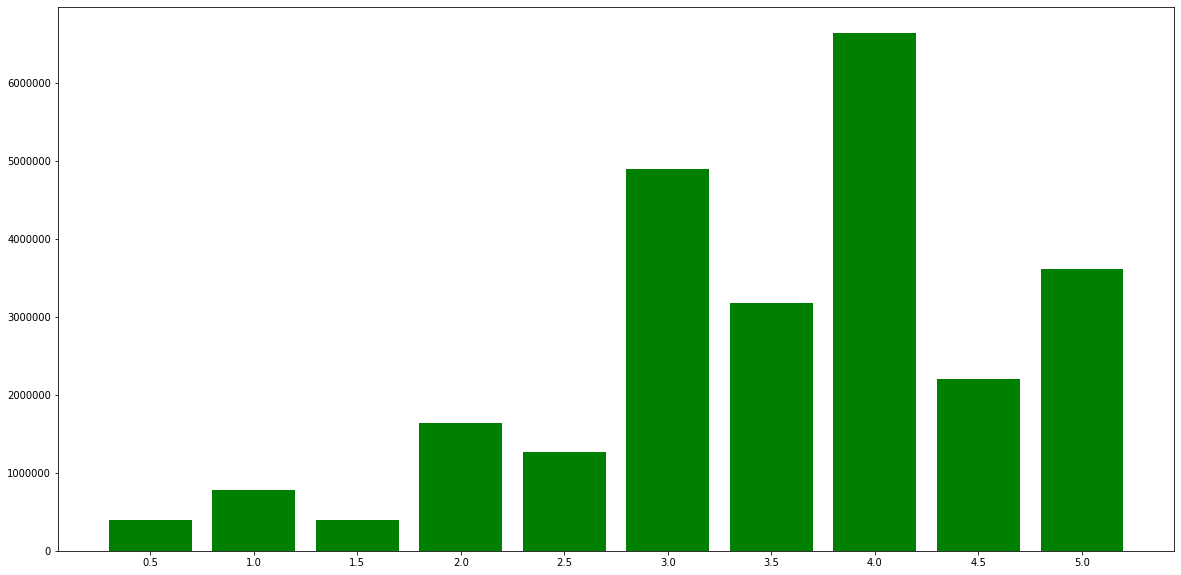

In [61]:
plt.figure(figsize=(20,10))
plt.bar(sortedresults.keys(), sortedresults.values(), color='g')